# Prov

## About

This is the start of some discussion on issues around prov tracking in OIH.
This may take two paths.  One would be the prov tracking indexers might do
and the other prov that providers would encode to provide specific prov
the community requests.

## Gleaner Prov

The Gleaner application generates a prov graph of the activity of accessing 
and indexing provider resources.  The main goal of this prov is to connect
an indexed URL to the digital object stored in the object store.  This 
digital object should be the JSON-LD data graph presented by the provider. 

By contrast, the authoritative reference in the various profiles will connect
the the data graph ID, or in the absence of that the data graph URL or the 
referenced resources URL by gleaner, to another reference.  This may be 
an organization ID or a PID of the connected resource. 



```{literalinclude} ./graphs/gleaner.json
:linenos:
```

In [1]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/gleaner.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/",
  "prov": "http://www.w3.org/ns/prov#"},
  "@explicit": "false",
  "@type":     "prov:Activity",
   "prov:generated": {},
   "prov:endedAtTime": {},
   "prov:used": {}
}


context = {
  "@vocab": "https://schema.org/",
  "prov": "http://www.w3.org/ns/prov#"
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)


{
    "@context": {
        "@vocab": "https://schema.org/",
        "prov": "http://www.w3.org/ns/prov#"
    },
    "@id": "https://gleaner.io/id/run/7c1eaa1aaed95861330109026c42e57a31ecae55",
    "@type": "prov:Activity",
    "prov:endedAtTime": {
        "@type": "http://www.w3.org/2001/XMLSchema#dateTime",
        "@value": "2021-04-20"
    },
    "prov:generated": {
        "@id": "urn:gleaner:milled:obis:7c1eaa1aaed95861330109026c42e57a31ecae55",
        "@type": "prov:Entity",
        "prov:value": "7c1eaa1aaed95861330109026c42e57a31ecae55.jsonld"
    },
    "prov:used": {
        "@id": "https://gleaner.io/id/collection/7c1eaa1aaed95861330109026c42e57a31ecae55",
        "@type": "prov:Collection",
        "prov:hadMember": {
            "@id": "https://obis.org/dataset/9381239f-3d64-48b4-80c9-b9ebb674edc2",
            "@type": "prov:Entity",
            "prov:value": "https://obis.org/dataset/9381239f-3d64-48b4-80c9-b9ebb674edc2",
            "prov:wasAttributedTo": {
        

## Nano Prov

This is a basic nanoprov example. Note, this is a draft and
the ID connections and examples have not been made yet.  


```{literalinclude} ./graphs/nanoprov.json
:linenos:
```

Fontconfig error: "/etc/fonts/conf.d/30-0-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/60-open-sans.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/62-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document



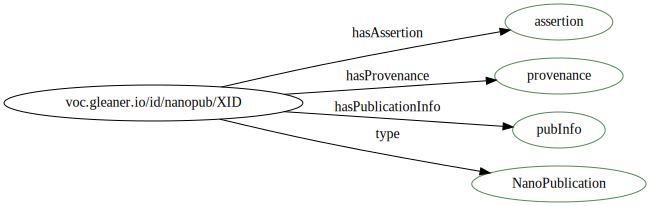

In [2]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/nanoprov.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

## Refs

[Nanopubs Guidance](https://nanopub.org/guidelines/working_draft/)